<a href="https://colab.research.google.com/github/Sharvari-Govele/Supervised_Machine-Learning/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Exploratory Data Analysis is done on house price information data to predict sale price of house.**

#**Loading packages** 

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading and Describing data**

In [167]:
data=pd.read_csv('kc_house_data.csv',index_col=[0])
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,country
0,7129300520,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7.0,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,UK
1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7.0,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,UK
2,5631500400,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6.0,770,0,1933,0,98028,47.7379,-122.233,2720,8062,UK
3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7.0,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,UK
4,1954400510,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8.0,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,UK


In [168]:
data.shape

(21613, 21)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21611 non-null  float64
 2   bedrooms       21612 non-null  float64
 3   bathrooms      21612 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21612 non-null  float64
 7   waterfront     21612 non-null  float64
 8   view           21612 non-null  float64
 9   condition      21613 non-null  int64  
 10  grade          21612 non-null  float64
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [170]:
data.describe()
#Gives statistical information about numerical variables

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161100e+04,21612.000000,21612.000000,21613.000000,2.161300e+04,21612.000000,21612.000000,21612.000000,21613.000000,21612.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.402070e+05,3.370813,2.114763,2079.899736,1.510697e+04,1.494332,0.007542,0.234314,3.409430,7.656904,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673699e+05,0.930074,0.770181,918.440897,4.142051e+04,0.539991,0.086519,0.766334,0.650743,1.175477,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [171]:
data.describe(include='all')
#Gives statistical information about numerical as well as categorical variables

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,country
count,2.161300e+04,2.161100e+04,21612.000000,21612.000000,21613.000000,2.161300e+04,21612.000000,21612.000000,21612.000000,21613.000000,21612.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UK
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21613
mean,4.580302e+09,5.402070e+05,3.370813,2.114763,2079.899736,1.510697e+04,1.494332,0.007542,0.234314,3.409430,7.656904,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,NaN
std,2.876566e+09,3.673699e+05,0.930074,0.770181,918.440897,4.142051e+04,0.539991,0.086519,0.766334,0.650743,1.175477,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,NaN
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,NaN
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,NaN
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,NaN
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,NaN


#**Target Variable**

price is our target variable in this project.

In [172]:
data['price'].describe()

count    2.161100e+04
mean     5.402070e+05
std      3.673699e+05
min      7.500000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

## **Outlier**

ways of treating outliers -
1. deletion 
2. capping / imputing - replacing values with mean, mode, median or limit values 
3. data transformation - taking log , square or square root 
4. binning 

In this problem we will be using imputing method. 

### **Visualize**

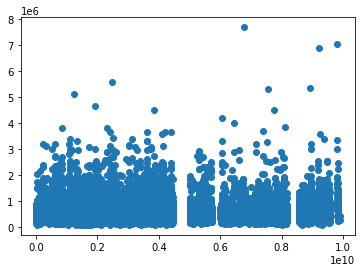

In [173]:
plt.scatter(x=data['id'],y=data['price'])

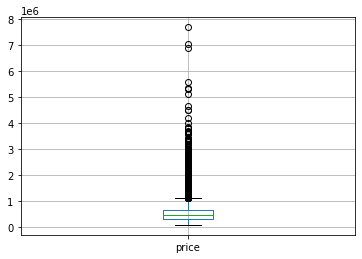

In [174]:
data.boxplot(column='price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


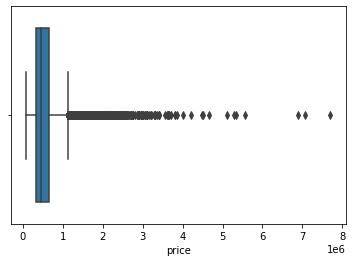

In [175]:
sns.boxplot(data['price'])

We can clearly see that there are outliers in our target vriable.

### **Mathematical way**

Imputing

In [176]:
q1=data['price'].quantile(0.25)
q3=data['price'].quantile(0.75)
iqr=q3-q1
iqr #interquartie range


323000.0

In [177]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(1129500.0, -162500.0)

In [178]:
def limit(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [179]:
data['price']=data['price'].apply(limit)
data['price'].describe()
#removing outliers

count    2.161100e+04
mean     5.116257e+05
std      2.500386e+05
min      7.500000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129500e+06
Name: price, dtype: float64

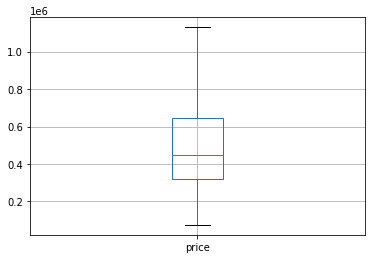

In [180]:
data.boxplot(column='price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


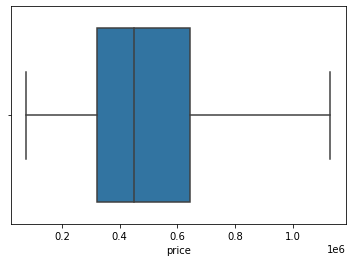

In [181]:
sns.boxplot(data['price'])

##**Missing values**

ways to treat Missing values
1. deletion 
2. imputing

Dropping null values of target variable is preferable because machine learns through target variables.

In [182]:
data['price'].isnull().sum()

2

In [183]:
data.dropna(inplace = True , axis=0, subset=['price'])

In [184]:
data.shape

(21611, 21)

(array([ 501., 3378., 4513., 3912., 3070., 1978., 1432.,  877.,  531.,
        1419.]),
 array([  75000.,  180450.,  285900.,  391350.,  496800.,  602250.,
         707700.,  813150.,  918600., 1024050., 1129500.]),
 <a list of 10 Patch objects>)

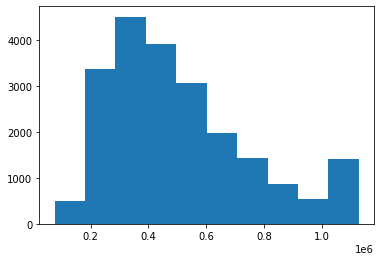

In [185]:
plt.hist(data['price'],bins=10)

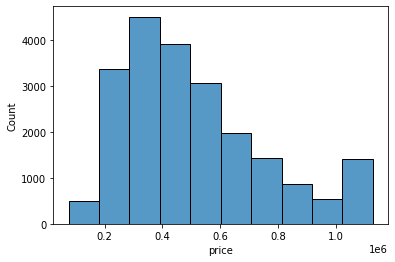

In [186]:
sns.histplot(data['price'],bins=10)


# **Independant varibales**

## **Numerical**

In [187]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,country
0,7129300520,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7.0,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,UK
1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7.0,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,UK
2,5631500400,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6.0,770,0,1933,0,98028,47.7379,-122.233,2720,8062,UK
3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7.0,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,UK
4,1954400510,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8.0,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,UK


In [188]:
numerical_columns=[	'bathrooms',	'bedrooms',	'sqft_living',	'sqft_lot'	,'floors','grade','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15'	]
numerical_columns
#separating numerical columns

['bathrooms',
 'bedrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [189]:
data[numerical_columns].head()

,bathrooms,bedrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,1.00,3.0,1180,5650,1.0,7.0,1180,0,47.5112,-122.257,1340,5650
1,2.25,3.0,2570,7242,2.0,7.0,2170,400,47.7210,-122.319,1690,7639
2,1.00,2.0,770,10000,1.0,6.0,770,0,47.7379,-122.233,2720,8062
3,3.00,4.0,1960,5000,1.0,7.0,1050,910,47.5208,-122.393,1360,5000
4,2.00,3.0,1680,8080,1.0,8.0,1680,0,47.6168,-122.045,1800,7503


In [190]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values = np.nan, strategy ='median')
data[numerical_columns]= imputer.fit_transform(data[numerical_columns])

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   price          21611 non-null  float64
 2   bedrooms       21611 non-null  float64
 3   bathrooms      21611 non-null  float64
 4   sqft_living    21611 non-null  float64
 5   sqft_lot       21611 non-null  float64
 6   floors         21611 non-null  float64
 7   waterfront     21610 non-null  float64
 8   view           21610 non-null  float64
 9   condition      21611 non-null  int64  
 10  grade          21611 non-null  float64
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21611 non-null  float64
 13  yr_built       21611 non-null  int64  
 14  yr_renovated   21611 non-null  int64  
 15  zipcode        21611 non-null  int64  
 16  lat            21611 non-null  float64
 17  long           21611 non-null  float64
 18  sqft_l

## **Categorical**

### **Variable Transformation**

In [192]:
data['zipcode']=data['zipcode'].astype(object)
data['waterfront']=data['waterfront'].astype(object)
data['view']=data['view'].astype(object)

In [193]:
data['zipcode'].shape

(21611,)

function impute.fit expects 2D array so we are reshaping zipcode column

In [194]:
column=data["zipcode"].values.reshape(-1,1) #-1 means it will adjust no.  of rows by itself 
column.shape

(21611, 1)

In [195]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values = np.nan, strategy ='most_frequent')
data['zipcode']= imputer.fit_transform(column)

In [196]:
column1=data["waterfront"].values.reshape(-1,1) #-1 means it will adjust no.  of rows by itself 
column1.shape

(21611, 1)

In [197]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values = np.nan, strategy ='most_frequent')
data['waterfront']= imputer.fit_transform(column1)

In [198]:
column2=data["view"].values.reshape(-1,1) #-1 means it will adjust no.  of rows by itself 
column2.shape

(21611, 1)

In [199]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values = np.nan, strategy ='most_frequent')
data['view']= imputer.fit_transform(column2)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   price          21611 non-null  float64
 2   bedrooms       21611 non-null  float64
 3   bathrooms      21611 non-null  float64
 4   sqft_living    21611 non-null  float64
 5   sqft_lot       21611 non-null  float64
 6   floors         21611 non-null  float64
 7   waterfront     21611 non-null  object 
 8   view           21611 non-null  object 
 9   condition      21611 non-null  int64  
 10  grade          21611 non-null  float64
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21611 non-null  float64
 13  yr_built       21611 non-null  int64  
 14  yr_renovated   21611 non-null  int64  
 15  zipcode        21611 non-null  object 
 16  lat            21611 non-null  float64
 17  long           21611 non-null  float64
 18  sqft_l

In [201]:
data['ever_renovate']=np.where(data['yr_renovated']==0,'No','Yes')
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,country,ever_renovate
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7.0,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,UK,No
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7.0,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,UK,Yes
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6.0,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0,UK,No
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7.0,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0,UK,No
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8.0,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,UK,No


In [202]:
data['Year since Renovation']=np.where(data['ever_renovate']=='Yes',abs(data['yr_built']-data['yr_renovated']),0)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,country,ever_renovate,Year since Renovation
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7.0,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,UK,No,0
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7.0,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,UK,Yes,40
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6.0,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0,UK,No,0
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7.0,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0,UK,No,0
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8.0,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,UK,No,0


In [203]:

data.shape

(21611, 23)

In [204]:
data.drop(columns=['yr_built', 'yr_renovated',], inplace= True)
data.shape

(21611, 21)

In [205]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,country,ever_renovate,Year since Renovation
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7.0,1180.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,UK,No,0
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7.0,2170.0,400.0,98125,47.7210,-122.319,1690.0,7639.0,UK,Yes,40
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6.0,770.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,UK,No,0
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7.0,1050.0,910.0,98136,47.5208,-122.393,1360.0,5000.0,UK,No,0
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8.0,1680.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,UK,No,0


In [206]:
data.drop(columns='id', inplace = True)

In [207]:
data['country'].unique()

array(['UK'], dtype=object)

As it contains only one unique value it will not contribute in giving meaningful insights

In [208]:
data.drop(columns='country', inplace = True)

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21611 non-null  float64
 1   bedrooms               21611 non-null  float64
 2   bathrooms              21611 non-null  float64
 3   sqft_living            21611 non-null  float64
 4   sqft_lot               21611 non-null  float64
 5   floors                 21611 non-null  float64
 6   waterfront             21611 non-null  object 
 7   view                   21611 non-null  object 
 8   condition              21611 non-null  int64  
 9   grade                  21611 non-null  float64
 10  sqft_above             21611 non-null  float64
 11  sqft_basement          21611 non-null  float64
 12  zipcode                21611 non-null  object 
 13  lat                    21611 non-null  float64
 14  long                   21611 non-null  float64
 15  sq

In [210]:
data['condition'].value_counts()

3    14031
4     5678
5     1700
2      172
1       30
Name: condition, dtype: int64

In [211]:
data['view'].value_counts()

0.0    19487
2.0      963
3.0      510
1.0      332
4.0      319
Name: view, dtype: int64

In [212]:
data['waterfront'].value_counts()

0.0    21448
1.0      163
Name: waterfront, dtype: int64

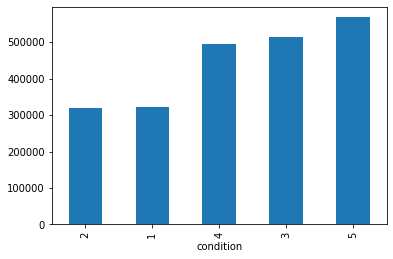

In [213]:
data.groupby('condition')['price'].mean().sort_values().plot(kind = 'bar')

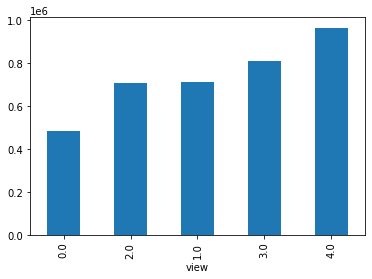

In [214]:
data.groupby('view',)['price'].mean().sort_values().plot(kind = 'bar')

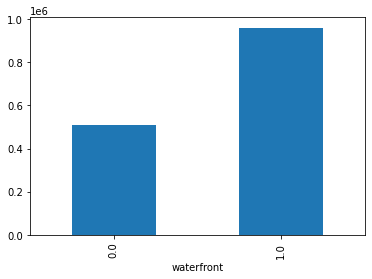

In [215]:
data.groupby('waterfront',)['price'].mean().sort_values().plot(kind = 'bar')

### **Anova test**


ANOVA stand for Analysis Of Variance


1. Null hypothesis - no difference in means
2. alternate hypothesis - means are different and variable does impact on target value

In [216]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

in python variable names should not have space so rename variable name

In [217]:
data=data.rename(columns={'Year since Renovation':'Year_since_Renovation'})

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21611 non-null  float64
 1   bedrooms               21611 non-null  float64
 2   bathrooms              21611 non-null  float64
 3   sqft_living            21611 non-null  float64
 4   sqft_lot               21611 non-null  float64
 5   floors                 21611 non-null  float64
 6   waterfront             21611 non-null  object 
 7   view                   21611 non-null  object 
 8   condition              21611 non-null  int64  
 9   grade                  21611 non-null  float64
 10  sqft_above             21611 non-null  float64
 11  sqft_basement          21611 non-null  float64
 12  zipcode                21611 non-null  object 
 13  lat                    21611 non-null  float64
 14  long                   21611 non-null  float64
 15  sq

In [219]:
df=data

In [220]:
mod=ols('price ~ condition', data=df).fit( )

In [221]:
Anova_Table=sm.stats.anova_lm(mod , typ=2)

In [222]:
print(Anova_Table)

                 sum_sq       df          F        PR(>F)
condition  2.367110e+12      1.0  37.926754  7.474695e-10
Residual   1.348675e+15  21609.0        NaN           NaN


In [223]:
mod=ols('price ~ ever_renovate', data=df).fit()
sm.stats.anova_lm(mod , typ=2)

,sum_sq,df,F,PR(>F)
ever_renovate,1.997922e+13,1.0,324.350395,5.494141e-72
Residual,1.331063e+15,21609.0,NaN,NaN


In [224]:
mod=ols('price ~ waterfront ', data=df).fit()
sm.stats.anova_lm(mod , typ=2)

,sum_sq,df,F,PR(>F)
waterfront,3.282940e+13,1.0,538.160768,1.295221e-117
Residual,1.318213e+15,21609.0,NaN,NaN


In [225]:

mod=ols('price ~ zipcode ', data=df).fit()
sm.stats.anova_lm(mod , typ=2)

,sum_sq,df,F,PR(>F)
zipcode,6.858635e+14,69.0,321.896339,0.0
Residual,6.651789e+14,21541.0,NaN,NaN


In [226]:
mod=ols('price ~ view ', data=df).fit()
sm.stats.anova_lm(mod , typ=2)

,sum_sq,df,F,PR(>F)
view,1.760412e+14,4.0,809.264259,0.0
Residual,1.175001e+15,21606.0,NaN,NaN


from above all output p value is less than 0.05 so we accept alternate hypothesis all these does impact on target variable and should be included in model

### **Dummy variable**

In [227]:
df=pd.get_dummies(df,columns=['waterfront','view','condition','ever_renovate'] , drop_first=True)

In [228]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Year_since_Renovation,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,ever_renovate_Yes
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,400.0,98125,47.7210,-122.319,1690.0,7639.0,40,0,0,0,0,0,0,1,0,0,1
2,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,0,0,0,0,0,0,0,1,0,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,910.0,98136,47.5208,-122.393,1360.0,5000.0,0,0,0,0,0,0,0,0,0,1,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,0,0,0,0,0,0,0,1,0,0,0


**Binning**

In [229]:
zip=df.groupby('zipcode').agg({'price':'mean'}).sort_values('price')

In [230]:
zip.head()

,price
zipcode,
98002,234284.035176
98168,240328.371747
98032,251296.240000
98001,280804.690608
98148,284908.596491


In [231]:
zip['zip_grp']=pd.cut(zip['price'],bins=10, labels=['zip_grp_0','zip_grp_1','zip_grp_2','zip_grp_3','zip_grp_4','zip_grp_5','zip_grp_6','zip_grp_7','zip_grp_8','zip_grp_9'], include_lowest=True)

In [232]:
zip=zip.drop(columns='price')

In [233]:
df=pd.merge(df,zip,left_on='zipcode', how='left',right_index=True)

In [234]:
df=df.drop(columns='zipcode')

In [235]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,Year_since_Renovation,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,ever_renovate_Yes,zip_grp
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,0.0,47.5112,-122.257,1340.0,5650.0,0,0,0,0,0,0,0,1,0,0,0,zip_grp_0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,400.0,47.7210,-122.319,1690.0,7639.0,40,0,0,0,0,0,0,1,0,0,1,zip_grp_2
2,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,0.0,47.7379,-122.233,2720.0,8062.0,0,0,0,0,0,0,0,1,0,0,0,zip_grp_2
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,910.0,47.5208,-122.393,1360.0,5000.0,0,0,0,0,0,0,0,0,0,1,0,zip_grp_3
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,0.0,47.6168,-122.045,1800.0,7503.0,0,0,0,0,0,0,0,1,0,0,0,zip_grp_4


In [236]:
df=pd.get_dummies(df,columns=['zip_grp'],drop_first=True)

In [237]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,Year_since_Renovation,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,ever_renovate_Yes,zip_grp_zip_grp_1,zip_grp_zip_grp_2,zip_grp_zip_grp_3,zip_grp_zip_grp_4,zip_grp_zip_grp_5,zip_grp_zip_grp_6,zip_grp_zip_grp_7,zip_grp_zip_grp_8,zip_grp_zip_grp_9
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,0.0,47.5112,-122.257,1340.0,5650.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,400.0,47.7210,-122.319,1690.0,7639.0,40,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,0.0,47.7379,-122.233,2720.0,8062.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,910.0,47.5208,-122.393,1360.0,5000.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,0.0,47.6168,-122.045,1800.0,7503.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


# **Splitting**

In [238]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,Year_since_Renovation,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,ever_renovate_Yes,zip_grp_zip_grp_1,zip_grp_zip_grp_2,zip_grp_zip_grp_3,zip_grp_zip_grp_4,zip_grp_zip_grp_5,zip_grp_zip_grp_6,zip_grp_zip_grp_7,zip_grp_zip_grp_8,zip_grp_zip_grp_9
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,0.0,47.5112,-122.257,1340.0,5650.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,400.0,47.7210,-122.319,1690.0,7639.0,40,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,0.0,47.7379,-122.233,2720.0,8062.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,910.0,47.5208,-122.393,1360.0,5000.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,0.0,47.6168,-122.045,1800.0,7503.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Y is for dependent variable and x is independent 

we are using iloc(rows,columns) function to define variables



In [239]:
Y =df.iloc[:,0]

In [240]:
X=df.iloc[:,1:31]

In [241]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [242]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17288, 30), (4323, 30), (17288,), (4323,))

# **Feature scaling**

variables are scaled to have similar magnitude and ranges so that model is not biased toward higher values


feature scaling is must for algorithm like logistic , linear, k- nearest, principal component analysis

and not required for tree-based algorithm

1. Standardisation - (x-mean)/standard deviation

it will have property of standard normal distribution with mean as 0 and std as 1

2. Min Max scaling - (x - min(x))/(max(x)-min(x)) 

value range lies between [0,1]

3. normalization - (x-mean)/(max(x)-min(x))

value range is fixed from -1 to 1
also called mean normalization

In [243]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()

In [244]:
x_train=scale.fit_transform(x_train)
x_train

array([[ 0.67730825,  0.82845811,  0.56651806, ...,  4.69254445,
        -0.28857563, -0.11405403],
       [-0.39262094, -1.4429789 ,  1.1964522 , ..., -0.213104  ,
        -0.28857563, -0.11405403],
       [-0.39262094, -0.46950589,  0.08863698, ..., -0.213104  ,
        -0.28857563, -0.11405403],
       ...,
       [ 0.67730825,  0.50396711,  0.47963059, ..., -0.213104  ,
        -0.28857563, -0.11405403],
       [ 0.67730825,  0.50396711,  0.89886262, ..., -0.213104  ,
        -0.28857563, -0.11405403],
       [ 0.67730825, -0.7939969 , -0.2589129 , ..., -0.213104  ,
        -0.28857563, -0.11405403]])

In [245]:
x_test=scale.transform(x_test)
x_test

array([[-0.39262094,  0.82845811,  0.76201486, ..., -0.213104  ,
         3.46529608, -0.11405403],
       [ 0.67730825, -1.4429789 , -0.44354877, ..., -0.213104  ,
        -0.28857563, -0.11405403],
       [ 0.67730825,  0.50396711,  0.8380414 , ..., -0.213104  ,
        -0.28857563, -0.11405403],
       ...,
       [ 0.67730825,  1.80193111,  2.04360502, ...,  4.69254445,
        -0.28857563, -0.11405403],
       [-1.46255013, -1.4429789 , -1.45361559, ..., -0.213104  ,
        -0.28857563, -0.11405403],
       [-0.39262094,  0.50396711, -0.24805196, ...,  4.69254445,
        -0.28857563, -0.11405403]])